# Plotting

## Simple `sympy` plotting

In [1]:
# Setup
from sympy import plot, Symbol
from sympy.plotting import plot3d, plot_parametric, plot3d_parametric_line

### A line on a cartesian plane

In [2]:
# Make the line
x = Symbol('x')   # Independent variable, x.
y = 2*x+3

# You may have to evaluate (hit Shift+Enter) this cell twice to make the plot pop-up.
plot(y, xlabel="x", ylabel="y")

<Figure size 640x480 with 1 Axes>

## The Folium of Descartes
A famous graph. 

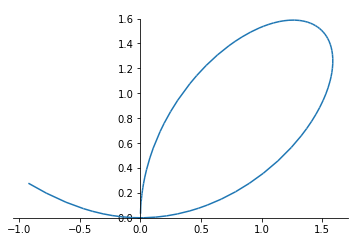

In [122]:
t = Symbol('t')
plot_parametric(3*t/(1+t**3),3*t**2/(1+t**3), (t, -0.3,90))

### Aside: Parametric Functions

You might wonder what a 'parametric' graph really means. You also might think it peculiar that there are two expressions passed into the `plot_parametric` function. 

In the simplest case, parametric equations have components specified by a single 'parameter', here our parameter is $t$. 

We then use $t$ to generate functions for $x$ and $y$ coordinates and those are the functions we've used to plot it.

e.g. for the 'Folium of Descartes' we have:

$$
x 
= 
\frac{3t}{1+t^3}
\qquad
y
=
\frac{3t^2}{1+t^3}
$$

> ```plot_parametric(3*t/(1+t**3),3*t**2/(1+t**3), (t, -0.3,90))```


For more on the 'Folium of Descartes', there is a good discussion of the object [here](https://en.wikipedia.org/wiki/Folium_of_Descartes).

### A plane on a 3D coordinate system

In [ ]:
# Make 'y' a variable as well.
y = Symbol('y')

# Plot the plane(s), but don't make them show yet. Also, remove their axes.
p = plot3d(2*x+3*y)
plot3d(x*y)
plot3d(-x*y)

In [ ]:
# Make the plane
y = Symbol('y')

# Plot the plane(s), but don't make them show yet. Also, remove their axes for visual appeal.
p1 = plot3d(2*x+3*y,  show=False, axis=False)   
p2 = plot3d(-x*y,     show=False, axis=False)
p3 = plot3d(x*y,      show=False, axis=False)

# Add visual contents of p2 and p3 to p1 -- essentially plots them on the same figure.
p1.append(p2[0])
p1.append(p3[0])

# Make p1 appear.
p1.show()

### A line in 3D space

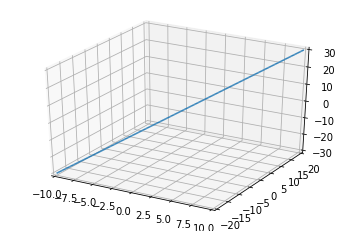

In [71]:
t = Symbol('t')

# Make the two plots, but don't show them yet.
p1 = plot3d_parametric_line(1*t, 2*t, 3*t, (t, -10, 10))

### Multiple lines with `sympy`

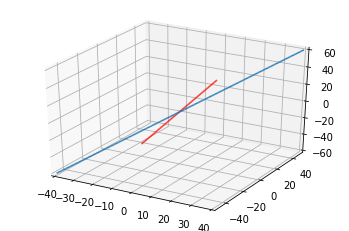

In [83]:
t = Symbol('t')

# Make the two plots, but don't show them yet.
p1 = plot3d_parametric_line(1*t, 2*t, 3*t, (t, -10, 10), show=False)
p2 = plot3d_parametric_line(4*t, 5*t, 6*t, show=False)

# Put the second plot (p2) in the same object as the first plot.
p1.append(p2[0])

# Color the lines differently
p1[0].line_color = 'r'

# Because we said 'show=False' earlier, we now have to call the 'show()' method.
p1.show()

### Limitations of `sympy` plotting

The `sympy` plotting utilities are written on top of the `matplotlib` utilities. Simple plots like these are useful for functions that we are mildly familiar with, but are not the best approach, because:

* `sympy` abstracts away how points are formed and plotted -- a feature that is useful for speed, but will inhibit you from working with any real significant data. 
* Shelter the user from the use of advanced tools available to us from `matplotlib` -- animations, vector-field plots, qualitative/descriptive visualisations.
* The manner in which multiple things are plotted is rather unintuitive and clunky -- the `append()` method has to be used if the plots are generated separately.


## Basic `matplotlib` plotting

We will use `numpy` to create our points and `matplotlib` to place those points on graphs in (hopefully) a meaningful way.

In [36]:
# It is standard practise to import numpy as np. 
import numpy as np   
# Python plots (or 'pyplots') is a class within matplotlib, and must be imported accordingly.
import matplotlib.pyplot as plt   

# Get versions to know which documentation to look up
from matplotlib import __version__ as plt_version
from numpy import __version__ as np_version
print('matplotlib is version: \t' + str(plt_version))
print('numpy is version: \t' + str(np_version))

matplotlib is version: 	3.0.3
numpy is version: 	1.16.2


We will use both `plt.scatter()` and `plt.plot()` for our plotting. The only difference between them is that `scatter` treats data like individual points and `plot` attempts to join the dots to create a line.

## Plot a single point

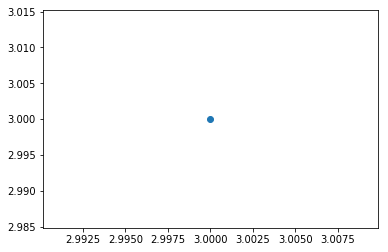

In [116]:
x = 3
y = 3

plt.scatter(x,y) # Axis will auto-scale.

## Plot a multiple points

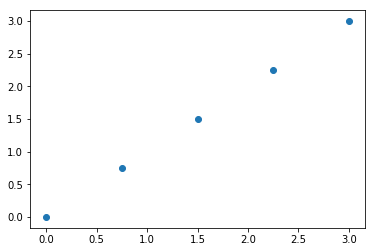

In [115]:
x = np.linspace(0,3, 5)  # Make 5 linearly spaced points between 0 and 3
y = np.linspace(0,3, 5)

plt.scatter(x,y)

### A line on a cartesian plane

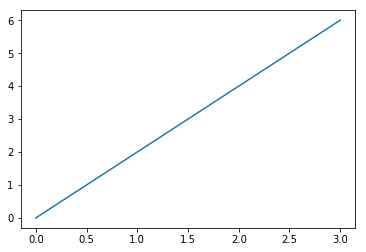

In [120]:
 # Generate linearly space points from 0 to 3.
x = np.linspace(0, 3)    # By default the function will create 50 points if you don't provide a third argument.
y = 2*x

plt.plot(x,y)   # Plots the dots and connects the dots.
plt.show()

### A line in 3D space

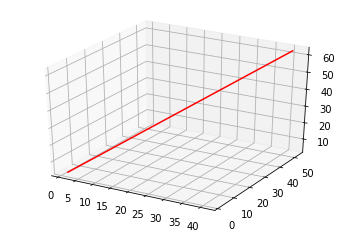

In [121]:
# Get the 3D axis.
from mpl_toolkits.mplot3d import Axes3D

# Create a 'figure' object.
fig = plt.figure()

# Create an 'axis' object. The 'gca()' method is used to "get current axis".
ax = fig.gca(projection='3d')

# Specify our points in x, y, z
x1 = 4*np.linspace(0,10) + 1
y1 = 5*np.linspace(0,10) + 2
z1 = 6*np.linspace(0,10) + 3

# Plot and make the color red
ax.plot(x1,y1,z1, color='r')

plt.show()

### A plane on a 3D coordinate system

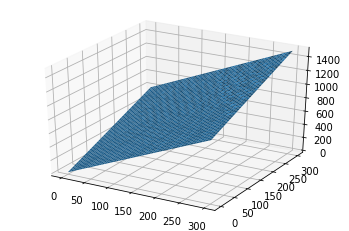

In [162]:
fig = plt.figure()
ax = fig.gca(projection='3d')


# Make the variables
x = np.linspace(0,300)      # 'x'-domain
y = np.linspace(0, 300)     # 'y'-domain
xv, yv = np.meshgrid(x,y)   # Make the domain for the plane.

# Equation of the plane.
z = 3*xv+2*yv

ax.plot_surface(xv, yv, z)

## More elaborate `matplotlib` plotting

Let's make expanded and more feature-filled versions of our other plots.

### Plots of lines on a cartesian plane

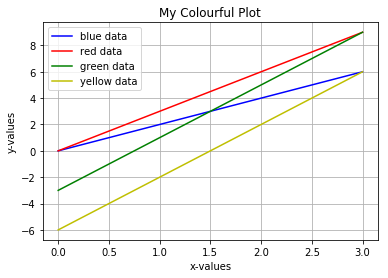

In [106]:
x = np.linspace(0,3)
y1 = 2*x
y2 = 3*x
y3 = 4*x-3
y4 = 4*x-6

plt.plot(x,y1, color='b', label='blue data')
plt.plot(x,y2, color='r', label='red data')
plt.plot(x,y3, color='g', label='green data')
plt.plot(x,y4, color='y', label='yellow data')

# Turn a grid on.
plt.grid()

# Title the plot.
plt.title('My Colourful Plot')

# Label axes
plt.xlabel('x-values')
plt.ylabel('y-values')

# Make the plot have a legend based on the data 'labels'
plt.legend()

Quoting the `matplotlib` documentation [here](https://matplotlib.org/3.0.3/gallery/color/color_demo.html), color can be specified with a letter.

> ```a single letter string, i.e. one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};```

### A plane on a 3D coordinate system

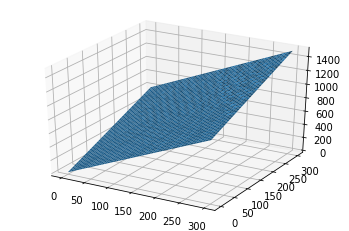

In [163]:
fig = plt.figure()
ax = fig.gca(projection='3d')


# Make the variables
x = np.linspace(0,300)      # 'x'-domain
y = np.linspace(0, 300)     # 'y'-domain
xv, yv = np.meshgrid(x,y)   # Make the square domain for the plane.

# Equation of the plane.
z = 3*xv+2*yv

# Plot the surface.
ax.plot_surface(xv, yv, z)

### Lines in 3D space

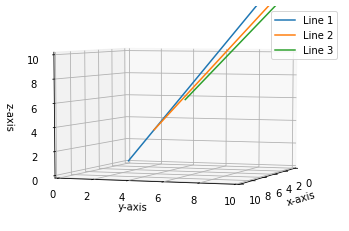

In [110]:
# Get the 3D axis.
from mpl_toolkits.mplot3d import Axes3D

# Create a 'figure' object.
fig = plt.figure()

# Create an 'axis' object.
ax = fig.gca(projection='3d')

# First line line of data
x1 = 1*np.linspace(0,10)
y1 = 2*np.linspace(0,10)
z1 = 3*np.linspace(0,10)
ax.plot(x1,y1,z1, label='Line 1')

# Second line of data
x2 = 4*np.linspace(0,10) + 1
y2 = 5*np.linspace(0,10) + 2
z2 = 6*np.linspace(0,10) + 3
ax.plot(x2,y2,z2, label='Line 2')

# Third line of data
x3 = 7*np.linspace(0,10) + 4
y3 = 8*np.linspace(0,10) + 5
z3 = 9*np.linspace(0,10) + 6
ax.plot(x3,y3,z3, label='Line 3')

# Specify axis limits
ax.set_xlim3d(0, 10)
ax.set_ylim3d(0,10)
ax.set_zlim3d(0,10)

# Label the axes
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# Specify viewing orientation
ax.view_init(5, 20.0)           # (Φ, θ)

# Get a legend showing, displaying the labels.
plt.legend()

# Display the result
plt.show()

# -------- Questions --------

## Question 1:



## Answer 1:


## Question 2:



## Answer 2:

## Question 3:



## Answer 3:

## Question $n$:



## Answer $n$: